# Import Library & Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score
from datasist.structdata import detect_outliers

# Read and Explore Data

In [2]:
df = pd.read_csv("C:/Users/D/Downloads/Sample-Superstore/Sample-Superstore.csv",encoding='windows-1254')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
#Check df info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
#Feature Engineering weight_status
df['Profitability'] = df['Profit']/df['Sales']

df['Order Date']=pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date']=pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['OrderY']=df['Order Date'].dt.year
df['OrderM']=df['Order Date'].dt.month

In [5]:
#Separating Categorical & Numerical Values
cats = [ 'Segment', 'Region', 'City','Category','Sub-Category','Ship Mode','State']
nums = ['Sales', 'Quantity', 'Discount', 'Profit','Profitability','OrderY','OrderM']

In [6]:
#Describe Categorical Values
df[cats].describe().T

,count,unique,top,freq
Segment,9994,3,Consumer,5191
Region,9994,4,West,3203
City,9994,531,New York City,915
Category,9994,3,Office Supplies,6026
Sub-Category,9994,17,Binders,1523
Ship Mode,9994,4,Standard Class,5968
State,9994,49,California,2001


In [7]:
#Describe Numerical Values
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.9400,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.0000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.2000,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.3640,8399.976
Profitability,9994.0,0.120314,0.466754,-2.750,0.07500,0.2700,0.3625,0.500
OrderY,9994.0,2015.722233,1.123555,2014.000,2015.00000,2016.0000,2017.0000,2017.000
OrderM,9994.0,7.809686,3.284654,1.000,5.00000,9.0000,11.0000,12.000


<AxesSubplot:>

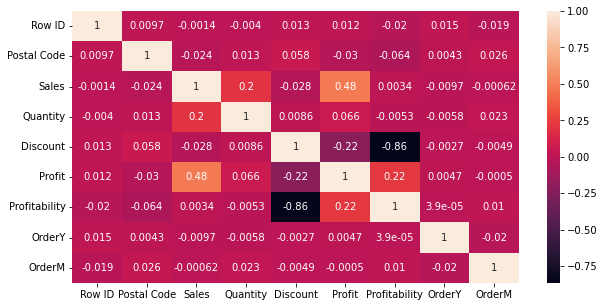

In [8]:
#Heatmap Correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True)

In [9]:
def type(x):
    if x <0:
        return 'red'
    else:
        return 'black'


In [10]:
#outliers_indices = detect_outliers(df, 0,['Profit'])
#len(outliers_indices)
#df.drop(outliers_indices , inplace = True)

   # Duplicate Value to prevent data leakage

In [11]:
#Check Duplicate Value
df.duplicated().sum()

0

In [12]:
#Remove Duplicate Value
df.drop_duplicates(inplace = True)
#Check Duplicate Value
df.duplicated().sum()

0

In [13]:
country = ['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware', 'New Jersey',
       'Wisconsin', 'Rhode Island', 'Maryland', 'Massachusetts', 'Missouri',
       'Alabama', 'Oklahoma', 'Arkansas', 'Connecticut']

df['State'] = df['State'].apply(lambda x:x if x in country else 'other' )
df['State']

0         Kentucky
1         Kentucky
2       California
3            other
4            other
           ...    
9989         other
9990    California
9991    California
9992    California
9993    California
Name: State, Length: 9994, dtype: object

In [14]:
country = ['New York City', 'Los Angeles', 'Seattle', 'San Francisco', 'Detroit',
       'Lafayette', 'Jackson', 'Atlanta', 'Minneapolis', 'San Diego',
       'Springfield', 'Columbus', 'Newark', 'Columbia', 'Richmond',
       'Providence', 'Henderson', 'Arlington', 'Lakewood', 'Milwaukee']

df['City'] = df['City'].apply(lambda x:x if x in country else 'other' )
df['City']

0         Henderson
1         Henderson
2       Los Angeles
3             other
4             other
           ...     
9989          other
9990          other
9991          other
9992          other
9993          other
Name: City, Length: 9994, dtype: object

In [15]:
df.drop(['Product Name','Sales','Profit','Quantity','Customer Name'],axis=1,inplace=True)

df.drop(['Row ID','Order ID','Customer ID','Country','Postal Code','Order Date','Ship Date','Product ID'],axis=1,inplace=True)


In [16]:
df.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Discount', 'Profitability', 'OrderY', 'OrderM'],
      dtype='object')

# Categorical Features

In [17]:
#Ordinal Encoding
#One Hot Encoding
df = pd.get_dummies(columns = cats, data = df, drop_first = True)
df

,Discount,Profitability,OrderY,OrderM,Segment_Corporate,Segment_Home Office,Region_East,Region_South,Region_West,City_Atlanta,...,State_Minnesota,State_Missouri,State_New Jersey,State_New York,State_Oklahoma,State_Rhode Island,State_Virginia,State_Washington,State_Wisconsin,State_other
0,0.00,0.1600,2016,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.00,0.3000,2016,11,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.00,0.4700,2016,6,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.45,-0.4000,2015,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.20,0.1125,2015,10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0.20,0.1625,2014,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9990,0.00,0.1700,2017,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9991,0.20,0.0750,2017,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9992,0.00,0.4500,2017,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.columns

Index(['Discount', 'Profitability', 'OrderY', 'OrderM', 'Segment_Corporate',
       'Segment_Home Office', 'Region_East', 'Region_South', 'Region_West',
       'City_Atlanta', 'City_Columbia', 'City_Columbus', 'City_Detroit',
       'City_Henderson', 'City_Jackson', 'City_Lafayette', 'City_Lakewood',
       'City_Los Angeles', 'City_Milwaukee', 'City_Minneapolis',
       'City_New York City', 'City_Newark', 'City_Providence', 'City_Richmond',
       'City_San Diego', 'City_San Francisco', 'City_Seattle',
       'City_Springfield', 'City_other', 'Category_Office Supplies',
       'Category_Technology', 'Sub-Category_Appliances', 'Sub-Category_Art',
       'Sub-Category_Binders', 'Sub-Category_Bookcases', 'Sub-Category_Chairs',
       'Sub-Category_Copiers', 'Sub-Category_Envelopes',
       'Sub-Category_Fasteners', 'Sub-Category_Furnishings',
       'Sub-Category_Labels', 'Sub-Category_Machines', 'Sub-Category_Paper',
       'Sub-Category_Phones', 'Sub-Category_Storage', 'Sub-Category_S

# Splitting Data¶

In [19]:
X = df.drop(['Profitability'], axis = 1)
y = df['Profitability']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
x_train.shape

(7995, 69)

# Scaling Data

In [21]:
scalar = StandardScaler()
scalar.fit_transform(x_train)

array([[ 0.22125225,  1.13767257, -0.85782653, ..., -0.23309238,
        -0.1061003 ,  1.14806934],
       [ 0.22125225, -1.53569636,  0.6613165 , ..., -0.23309238,
        -0.1061003 ,  1.14806934],
       [-0.75553436, -0.64457338,  1.2689737 , ..., -0.23309238,
        -0.1061003 , -0.87102753],
       ...,
       [-0.75553436, -0.64457338,  0.6613165 , ..., -0.23309238,
        -0.1061003 , -0.87102753],
       [ 0.22125225,  0.2465496 , -0.25016932, ..., -0.23309238,
        -0.1061003 , -0.87102753],
       [-0.75553436,  0.2465496 , -0.25016932, ..., -0.23309238,
        -0.1061003 , -0.87102753]])

# Modeling

In [22]:
#Best Feature Importance Evaluation
models = {
    #"LR": LinearRegression(),
    #"KNNR" : KNeighborsRegressor(), 
    #"SVR": SVR(),
    #"DT": DecisionTreeRegressor(),
    #"RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(booster = 'dart',eta=0.2,max_depth=3)
}


In [23]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: XGBR
Training Score: 0.9565723670523798
Test Score: 0.957698325819444
------------------------------


# Cross Validation

In [24]:
for name, model in models.items():
    print(f'Using model: {name}')
    cv_results = cross_validate(model, X, y, cv=5, return_train_score = True)
    print('train score = ', cv_results['train_score'].mean())
    print('test_score = ', cv_results['test_score'].mean())
    print('-'*50)

Using model: XGBR
train score =  0.957676865147375
test_score =  0.9534296657596499
--------------------------------------------------


In [25]:
import joblib
joblib.dump(model,'model.h5')
joblib.dump(scalar,'scalar.h5')
joblib.dump(df.columns,'features.h5')

['features.h5']